In [42]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from scipy.stats import norm
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [94]:
ticker = "DIS"
data = pdr.get_data_yahoo(ticker, start="2017-01-01")["Adj Close"]

# tickers= ["GOOG", "TSLA"]
# data = pdr.get_data_yahoo(tickers, start="2017-01-01")["Adj Close"]

In [95]:
log_returns = np.log(data/data.shift(1))

In [96]:
mu = log_returns.mean()
var = log_returns.var()
stdev = log_returns.std()

# weights = np.array(np.random.random(len(tickers)))
# weights = weights/np.sum(weights)
# mu = np.sum(log_returns.mean() * weights)
# var = np.dot(weights.T, np.dot(log_returns.cov(), weights))
# stdev = np.sqrt(var)

drift = mu - (var/2)

In [97]:
# Simulated daily returns'
t_intervals = 252 # one year simualtion
iterations = 10000 # number of sims to run

daily_returns = np.exp(drift + (stdev * norm.ppf(np.random.rand(t_intervals, iterations))))

In [98]:
daily_returns.shape

(252, 10000)

In [99]:
S0 = data.iloc[-1]

# S0 = np.sum(data.iloc[-1] * weights)

daily_price = np.zeros_like(daily_returns)
daily_price[0] = S0

In [100]:
for t in range(1, t_intervals):
    daily_price[t] = daily_price[t-1] * daily_returns[t]

In [101]:
print(daily_price.min(), daily_price.max())

46.33406132174874 389.9281916632813


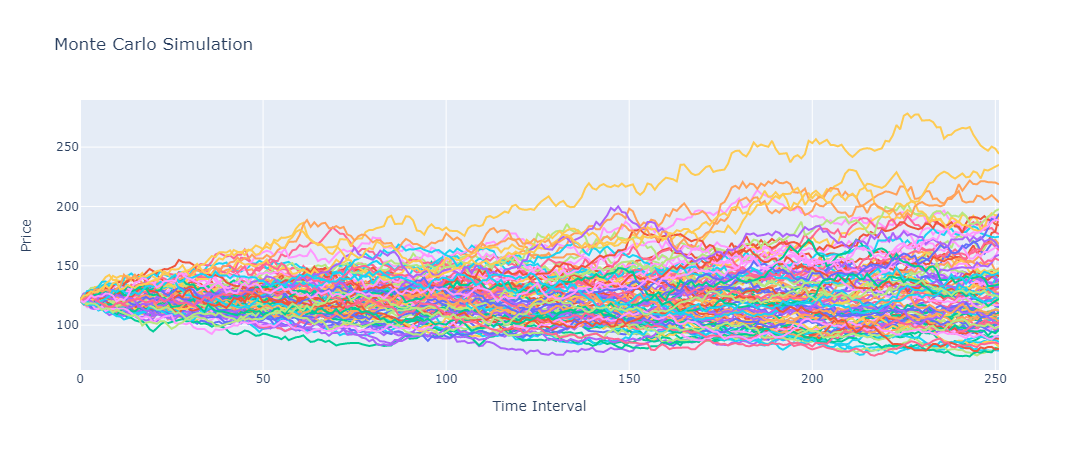

In [102]:
plots = []

for i in range(100,200):
    plot = go.Scatter(y = daily_price[:, i])
    plots.append(plot)


layout = go.Layout(title = f'Monte Carlo Simulation', yaxis = dict(title = 'Price'), 
                   xaxis = dict(title = 'Time Interval'), showlegend=False)    

fig = go.Figure(data=plots, layout=layout)
fig.show()

In [103]:
terminal_prices = pd.DataFrame({"Initial": daily_price[0], "Terminal": daily_price[-1]})
terminal_prices["Percent_Change"] = (terminal_prices["Terminal"]/terminal_prices["Initial"]) - 1
terminal_prices.sort_values(by=["Percent_Change"], inplace=True)
terminal_prices

,Initial,Terminal,Percent_Change
5337,121.099998,47.232123,-0.609974
8435,121.099998,48.429414,-0.600087
1512,121.099998,49.064606,-0.594842
6998,121.099998,50.409476,-0.583737
6019,121.099998,50.425012,-0.583608
...,...,...,...
8919,121.099998,328.698465,1.714273
3874,121.099998,337.176733,1.784284
3207,121.099998,340.409752,1.810981
9787,121.099998,380.643658,2.143218


In [104]:
# VaR
conf = 0.95
var = terminal_prices.iloc[int(terminal_prices["Percent_Change"].count() * (1-conf))]["Percent_Change"]
var

-0.3726839849269976

In [105]:
# CVaR
conf = 0.95
cvar = terminal_prices.iloc[:int(terminal_prices["Percent_Change"].count() * (1-conf))]["Percent_Change"].mean()
cvar

-0.43738939166056356

In [106]:
# Price
print(S0, terminal_prices["Terminal"].mean())
print(S0, terminal_prices["Terminal"].median())

121.0999984741211 126.66285955627903
121.0999984741211 121.33649618369088


In [107]:
# Return
print(terminal_prices["Percent_Change"].mean())
print(terminal_prices["Percent_Change"].median())

0.04593609539430929
0.0019529125726647223


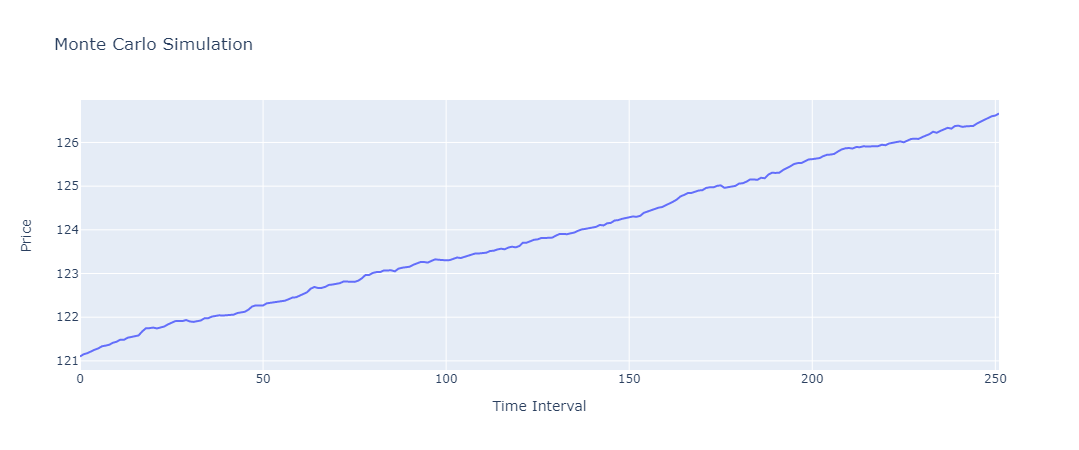

In [108]:
plot = go.Scatter(y = daily_price.mean(axis=1))

layout = go.Layout(title = f'Monte Carlo Simulation', yaxis = dict(title = 'Price'), 
                   xaxis = dict(title = 'Time Interval'), showlegend=False)    

fig = go.Figure(data=plot, layout=layout)
fig.show()